In [9]:
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, sklearn, IPython.display as ipd
import librosa, librosa.display
import warnings
warnings.simplefilter("ignore")

In [10]:
x, sr = librosa.load("../data/archive/musicnet/musicnet/test_data/1819.wav",duration=3)

In [11]:
ipd.Audio(x,rate=sr)


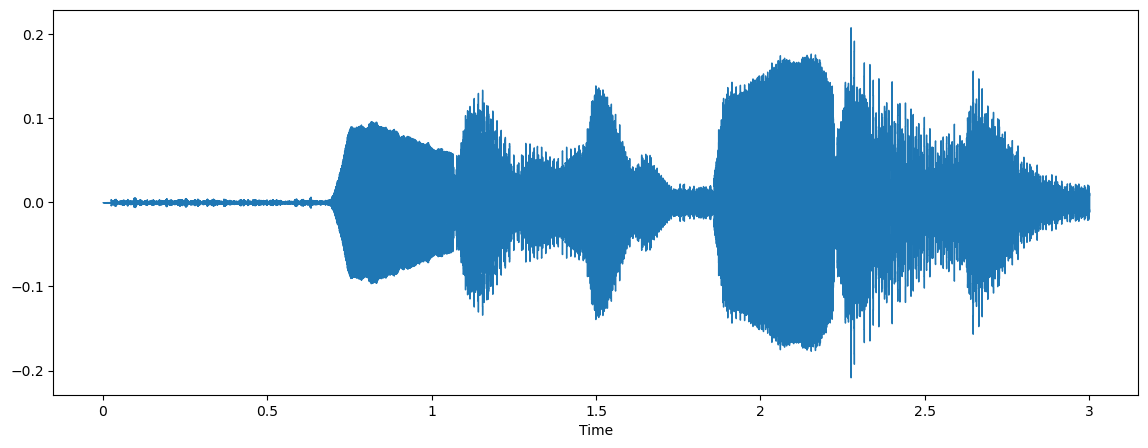

In [12]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x,sr)

In [13]:
onset_frames = librosa.onset.onset_detect(x, sr=sr, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)
print(onset_frames) # frame numbers of estimated onsets
onset_times = librosa.frames_to_time(onset_frames)
print(onset_times)

[  3   9  12  28  32  47  53  65  80  82  97 114 129]
[0.06965986 0.20897959 0.27863946 0.65015873 0.74303855 1.09133787
 1.2306576  1.50929705 1.85759637 1.90403628 2.2523356  2.64707483
 2.99537415]


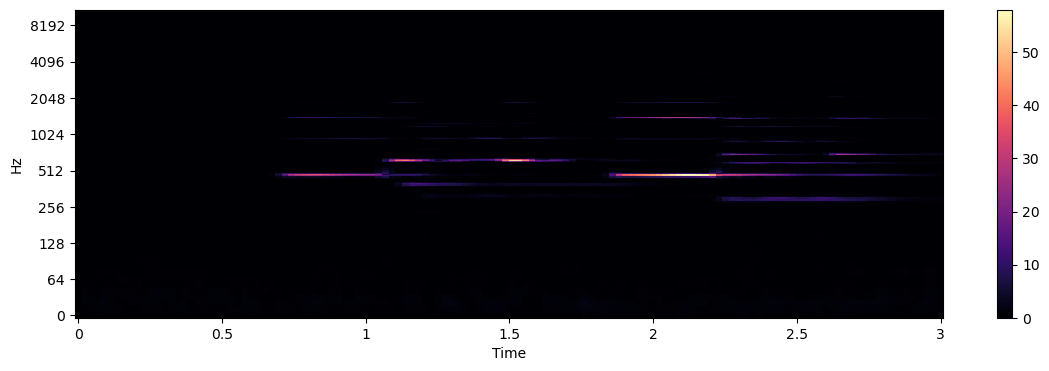

In [16]:
S = librosa.stft(x)
S_db = librosa.amplitude_to_db(abs(S))
plt.figure(figsize=(14, 4))
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='log')
#plt.vlines(onset_times, 0, 10000, color='#3333FF')
plt.colorbar()

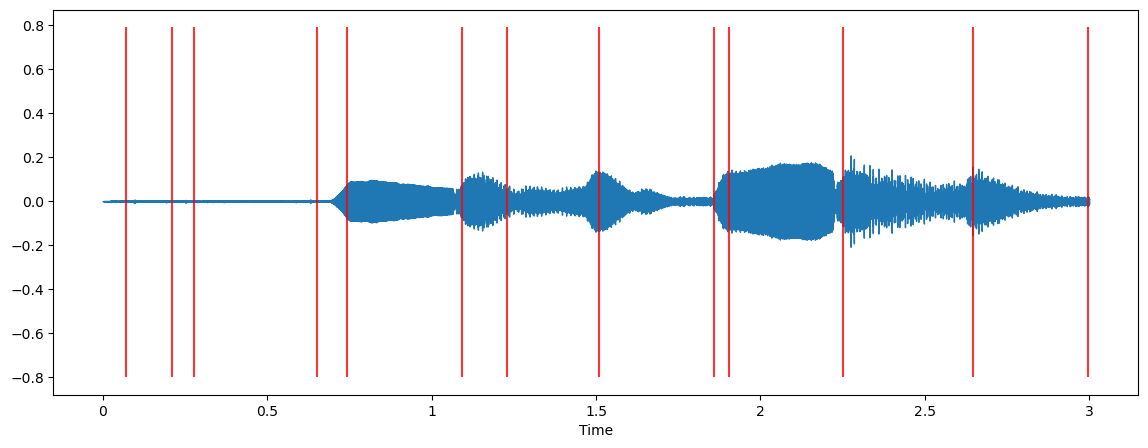

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
plt.vlines(onset_times, -0.8, 0.79, color='r', alpha=0.8) 

In [ ]:
clicks = librosa.clicks(frames=onset_frames, sr=sr, length=len(x))
ipd.Audio(x + clicks, rate=sr)

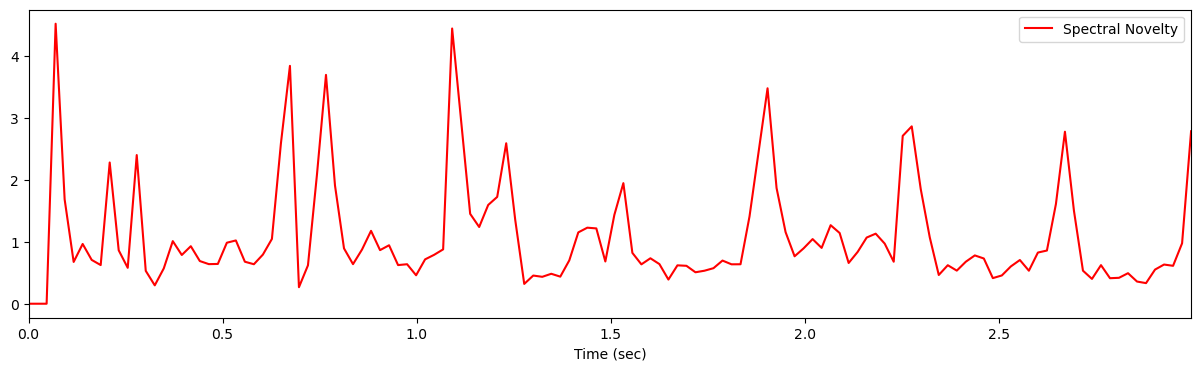

In [ ]:
spectral_novelty = librosa.onset.onset_strength(x,sr=sr)
frames = numpy.arange(len(spectral_novelty))
t = librosa.frames_to_time(frames, sr=sr)
plt.figure(figsize=(15, 4))
plt.plot(t, spectral_novelty, 'r-')
plt.xlim(0, t.max())
plt.xlabel('Time (sec)')
plt.legend(('Spectral Novelty',))

In [18]:
X, X_phase = librosa.magphase(S)
n_components = 6
W, H = librosa.decompose.decompose(X,n_components=n_components, sort=True)

In [ ]:
print(W.shape)
print(H.shape)
print(X.shape)

(1025, 6)
(6, 130)
(1025, 130)


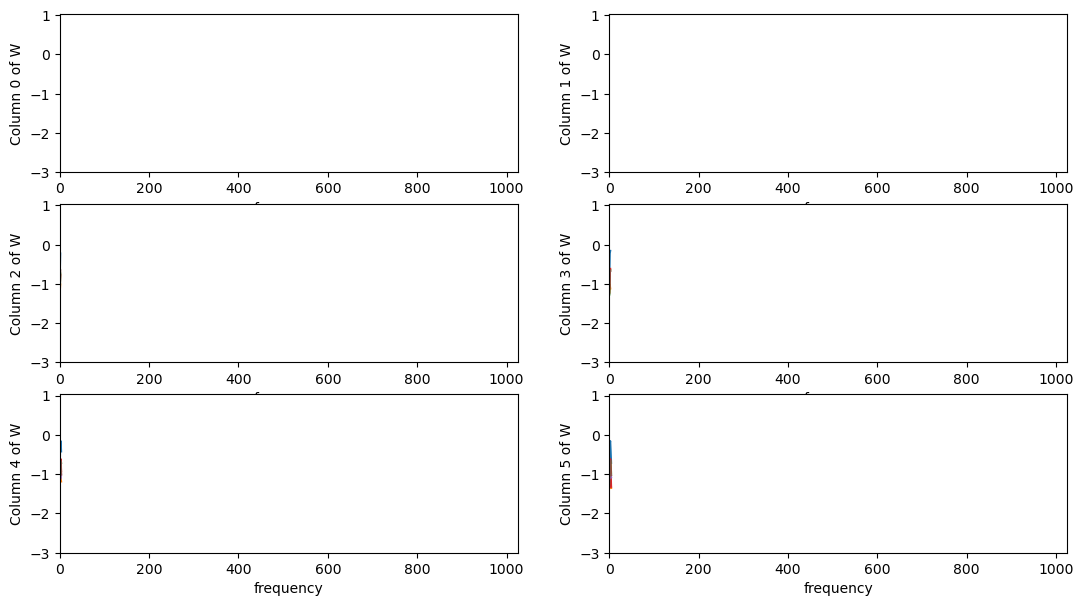

In [19]:
plt.figure(figsize=(13, 7))
logW = numpy.log10(W)
for n in range(n_components):
    plt.subplot(3, 2, n+1)
    plt.plot(logW[:,n])
    plt.ylim(-3, logW.max())
    plt.xlim(0, W.shape[0])
    plt.ylabel('Column %d of W' % n)
    plt.xlabel('frequency')

In [25]:
logW[:,1].shape
logW[:1].shape


(1, 6)

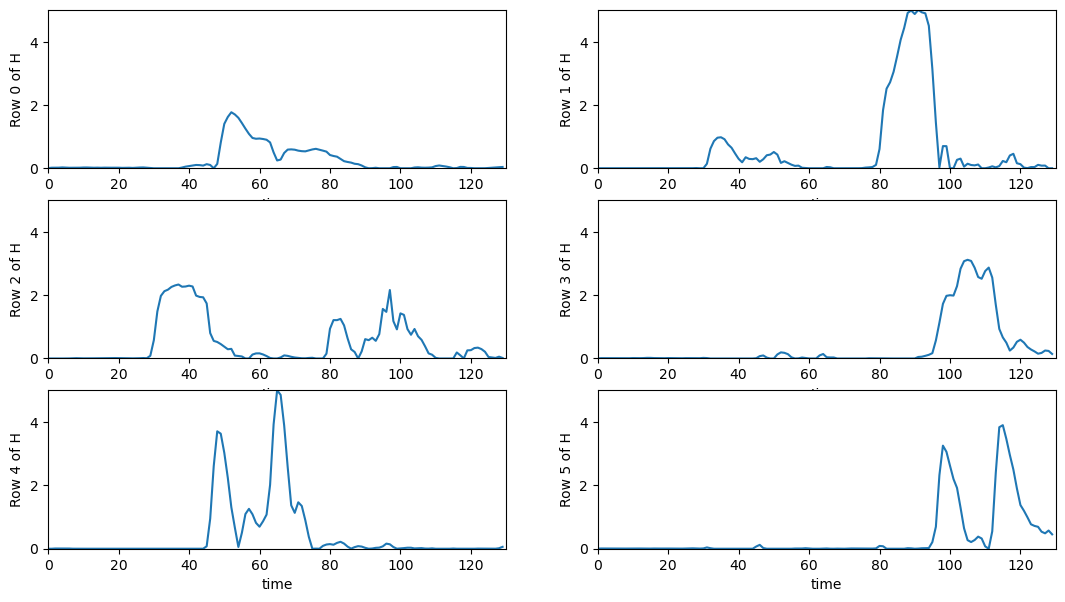

In [ ]:
plt.figure(figsize=(13, 7))
for n in range(n_components):
    plt.subplot(3, 2, n+1)
    plt.plot(H[n])
    plt.ylim(0, H.max())
    plt.xlim(0, H.shape[1])
    plt.ylabel('Row %d of H' % n)
    plt.xlabel('time')